In [163]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

Loading images

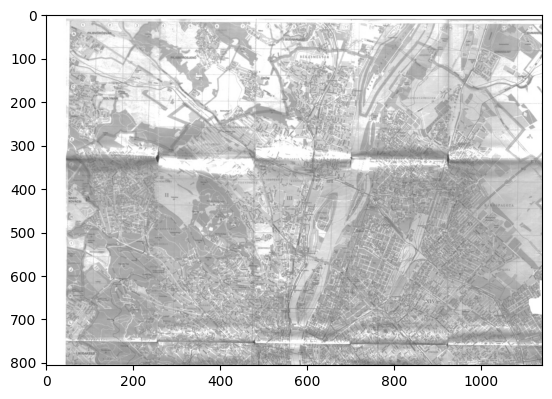

In [164]:
img1 = cv2.imread("budapest1.jpg")
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)

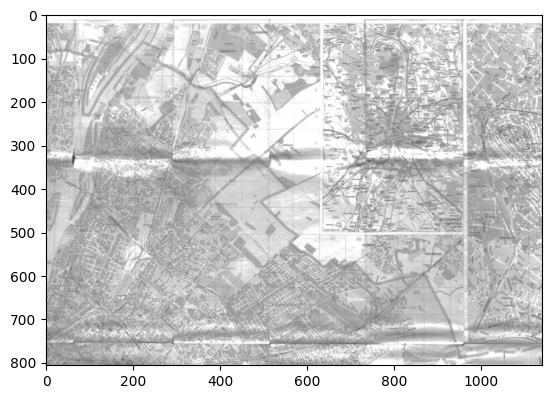

In [165]:
img2 = cv2.imread("budapest2.jpg")
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)
plt.imshow(img2)

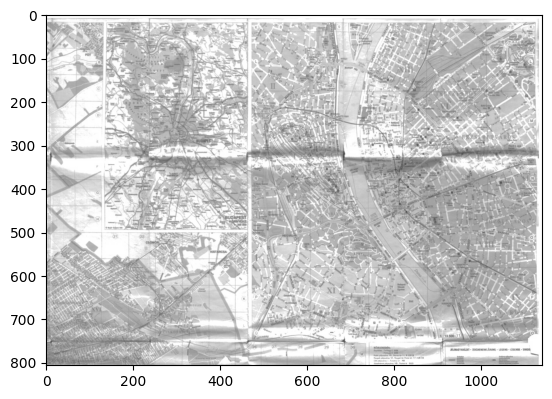

In [166]:
img3 = cv2.imread("budapest3.jpg")
img3 = cv2.cvtColor(img3 , cv2.COLOR_BGR2RGB)
plt.imshow(img3)

genrating keypoints

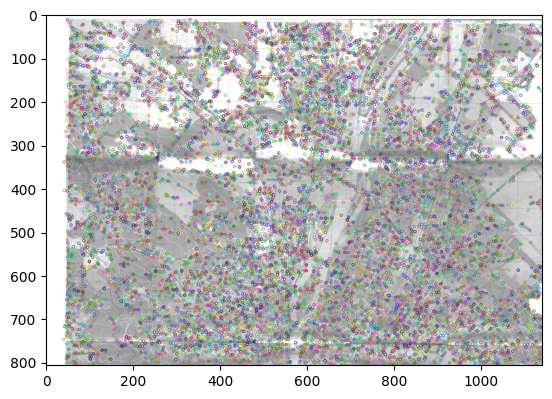

In [167]:
sift = cv2.SIFT_create()
img1kp , img1des = sift.detectAndCompute(img1 , None)
plt.imshow(cv2.drawKeypoints(img1 , img1kp , None))

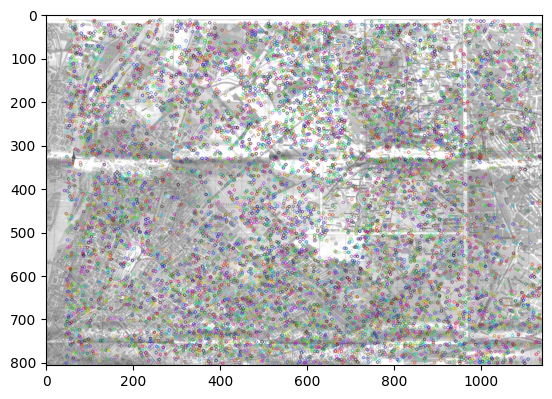

In [168]:
img2kp , img2des = sift.detectAndCompute(img1 , None)
plt.imshow(cv2.drawKeypoints(img2 , img2kp , None))

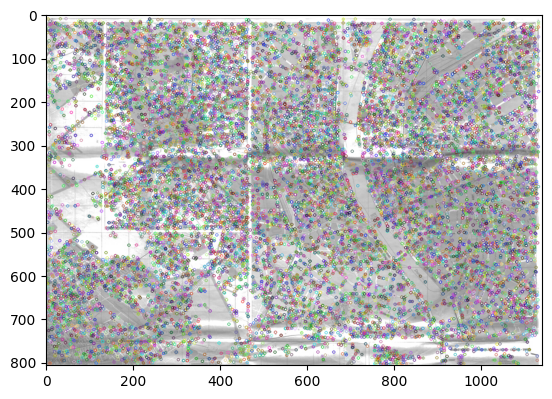

In [169]:
img3kp , img3des = sift.detectAndCompute(img3 , None)
plt.imshow(cv2.drawKeypoints(img3 , img3kp , None))

raw-matching

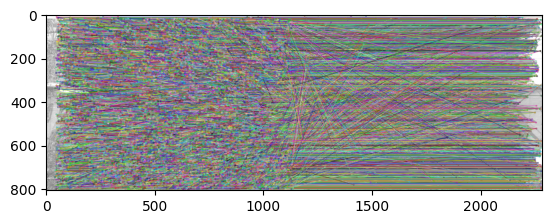

In [170]:
bf = cv2.BFMatcher(cv2.NORM_L1 , crossCheck = False)
matching12 = bf.knnMatch(img2des , img1des , k = 2)
matching23 = bf.knnMatch(img3des , img2des , k = 2)
plt.imshow(cv2.drawMatchesKnn(img2 , img2kp , img1 , img1kp , matching12 , None))

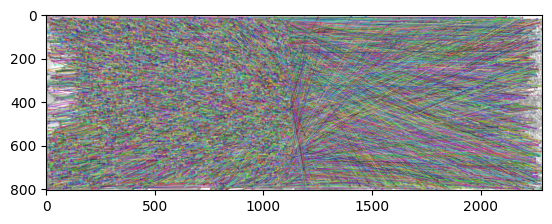

In [171]:
plt.imshow(cv2.drawMatchesKnn(img3 , img3kp , img2 , img2kp , matching23 , None))

imageShifter

In [172]:
def ShiftImage(img, x , y , shape):
    TM = np.array([
        [1 , 0  , x],
        [0 , 1 , y],
        [0 , 0 , 1]
    ] , dtype=np.float32)
    img = cv2.warpPerspective(img , TM , shape)
    return img

goodMatches

In [173]:
def GenrateGoodKeyPoints(rawMatches):
    goodKeypoints = []
    goodMatches = []
    for m1 , m2 in rawMatches:
        if m1.distance < 0.8 * m2.distance:
            goodMatches.append([m1])
            goodKeypoints.append((m1.trainIdx , m1.queryIdx))
    return goodMatches , goodKeypoints

gmatch12 , gkp12 = GenrateGoodKeyPoints(matching12)
gmatch23 , gkp23 = GenrateGoodKeyPoints(matching23)
print(gkp12)
print(gkp23)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (99, 99), (100, 100), (101, 1

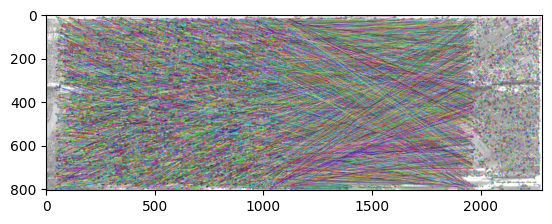

In [174]:
plt.imshow(cv2.drawMatchesKnn(img2 , img2kp , img3 , img3kp , gmatch12 ,None))

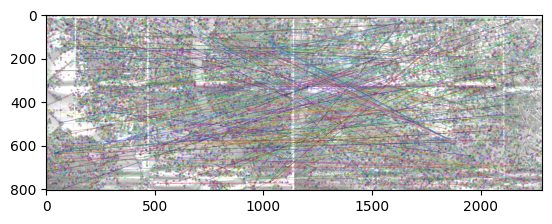

In [175]:
plt.imshow(cv2.drawMatchesKnn(img3 , img3kp , img2 , img2kp , gmatch23 ,None))

Homography estimation

In [176]:
def HomographyEstimator(srckp,deskp,goodkp):
    src = np.array([srckp[i].pt for (i , _) in goodkp])
    des = np.array([deskp[i].pt for (_ , i) in goodkp])
    H , _ = cv2.findHomography(np.float32(src) , np.float32(des) , cv2.RANSAC , 5.0)
    return H

In [177]:
H12 = HomographyEstimator(img2kp , img1kp , gkp12)
H12

array([[ 1.00000000e+00, -5.64437270e-16,  8.16365242e-12],
       [-1.07323593e-14,  1.00000000e+00,  7.42145106e-12],
       [-2.53817493e-17, -1.46236109e-18,  1.00000000e+00]])

In [178]:
H23 = HomographyEstimator(img2kp , img3kp , gkp23)
H23

array([[ 1.93759476e+01,  4.53747366e+01, -1.34859155e+04],
       [ 2.50774360e+01, -7.94798511e+00, -1.02937056e+04],
       [ 1.03605600e-02,  3.08888056e-02,  1.00000000e+00]])

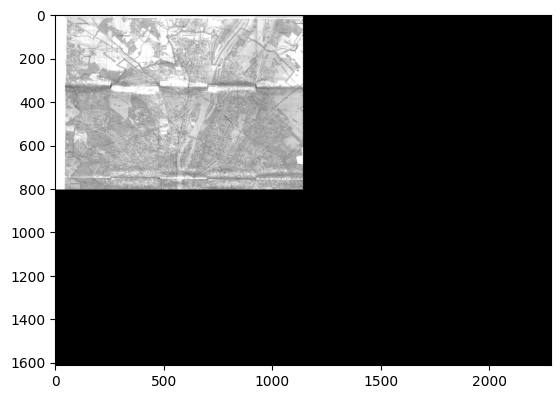

In [179]:
p10 = cv2.warpPerspective(img1.copy() , H12 , (img1.shape[1]*2 , img1.shape[0]*2))
plt.imshow(p10)

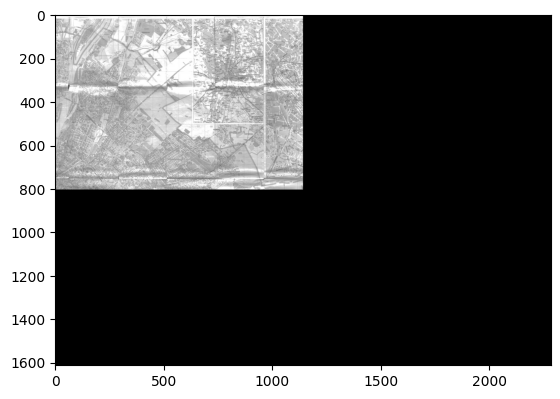

In [180]:
p12 = np.zeros([p10.shape[0] , p10.shape[1] , 3], np.uint8)
p12[:img2.shape[0] , :img2.shape[1]] = img2
plt.imshow(p12)

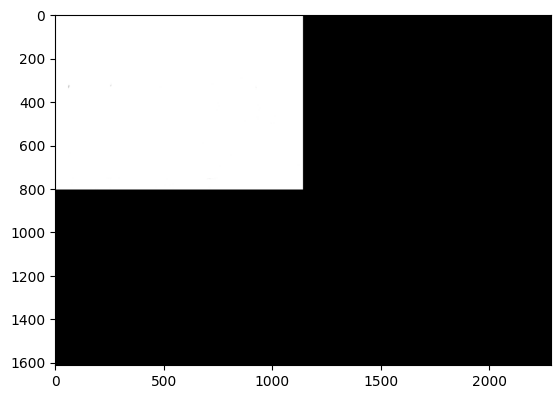

In [181]:
plt.imshow(cv2.add(p10.astype(np.uint8) , p12.astype(np.uint8)))

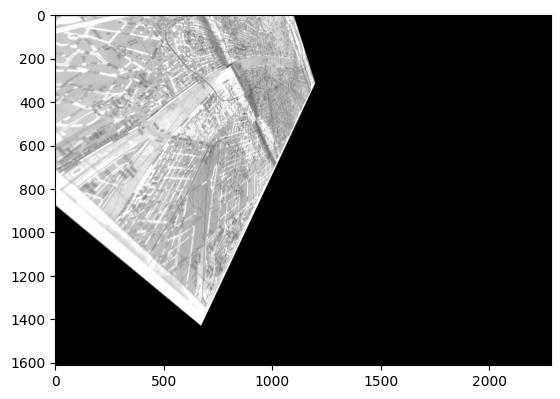

In [182]:
p2 = cv2.warpPerspective(img3, H23 , (img2.shape[1]*2 , img2.shape[0]*2))
plt.imshow(p2)

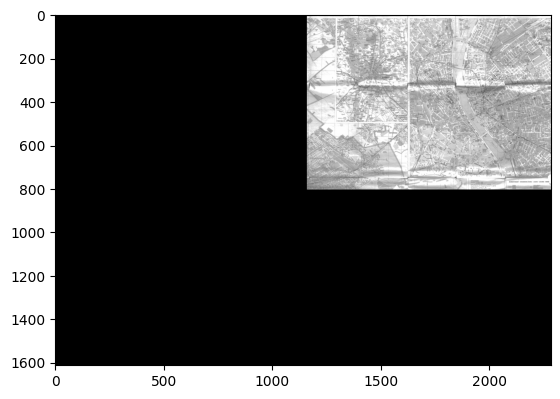

In [183]:
plt.imshow(ShiftImage(img3 , 1160 , 0 , (img1.shape[1]*2 , img1.shape[0]*2)))

In [184]:
# plt.imshow(ShiftImage(img2, 0 , 0))
img2Shift = ShiftImage(img2 , 500 , 400 , (img1.shape[1]*2 , img1.shape[0]*2))

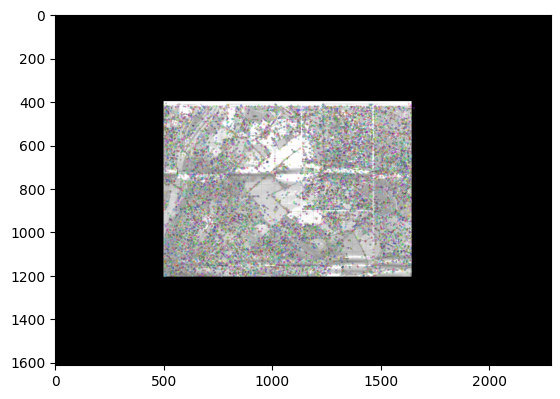

In [185]:
sift = cv2.SIFT_create()
img2Shiftkp , img2Shiftdes = sift.detectAndCompute(img2Shift , None)
plt.imshow(cv2.drawKeypoints(img2Shift , img2Shiftkp , None))

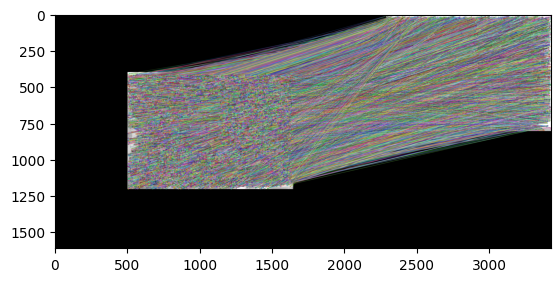

In [187]:
match23 = bf.knnMatch(img2Shiftdes , img3des, k = 2)
plt.imshow(cv2.drawMatchesKnn(img2Shift , img2Shiftkp , img3  , img3kp , match23 , None))

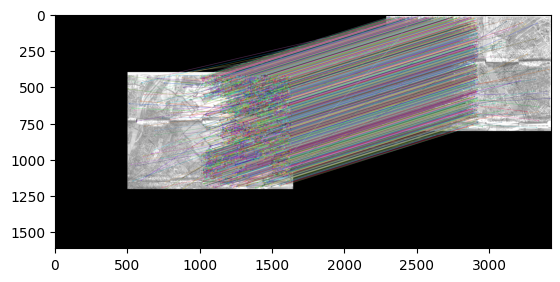

In [190]:
goodMatches , goodKeypoint = GenrateGoodKeyPoints(match23)
plt.imshow(cv2.drawMatchesKnn(img2Shift , img2Shiftkp , img3 , img3kp , goodMatches , None , flags=2))

In [193]:
H = HomographyEstimator(img3kp , img2Shiftkp  , goodKeypoint)
H

array([[ 9.39368093e-01,  1.96559914e-03,  1.00039718e+03],
       [-2.72502647e-02,  9.91157175e-01,  4.06816227e+02],
       [-3.26432266e-05, -3.72533832e-06,  1.00000000e+00]])

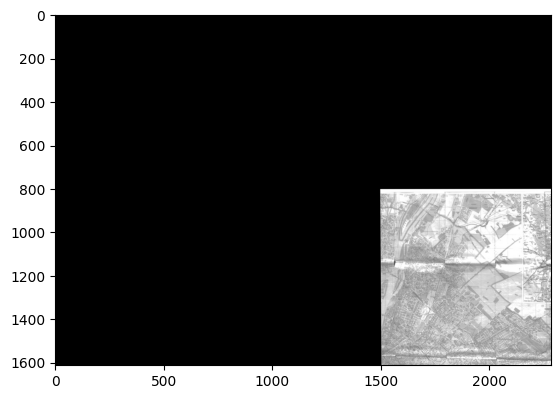

In [200]:
Timg3 = cv2.warpPerspective(img2Shift , H , None)
plt.imshow(Timg3)